In [25]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [26]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [27]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [28]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [29]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
columns_to_normalize = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d',
                        'price_change_percentage_14d', 'price_change_percentage_30d',
                        'price_change_percentage_60d', 'price_change_percentage_200d',
                        'price_change_percentage_1y']])

In [30]:
# Create a DataFrame with the scaled data


df_scaled = pd.DataFrame(columns_to_normalize, columns= ['price_change_percentage_24h', 'price_change_percentage_7d',
                        'price_change_percentage_14d', 'price_change_percentage_30d',
                        'price_change_percentage_60d', 'price_change_percentage_200d',
                        'price_change_percentage_1y'] )

# Copy the crypto names from the original data
df_scaled['coin_id'] = df_market_data.index

# Set the 'coin_id' column as the index
df_scaled.set_index('coin_id', inplace=True)

# Display sample data
df_scaled.head(5)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [31]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [32]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
    
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=i, random_state=1)
# 2. Fit the model to the data using `df_market_data_scaled`
    model.fit(df_scaled)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

C:\Users\rober\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


In [33]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k,'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923
5,6,52.933559
6,7,47.983124
7,8,37.288187
8,9,33.061685
9,10,28.779752


In [34]:
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(x='k',
                     y='inertia',
                     xlabel='Number of Clusters (k_values)',
                     ylabel='Inertia',
                     title='Elbow Curve',
                     xticks=k)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** According to the elbow method and the plot the optimal value for k, the number of clusters, is 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [35]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [36]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)

KMeans(n_clusters=4, random_state=1)

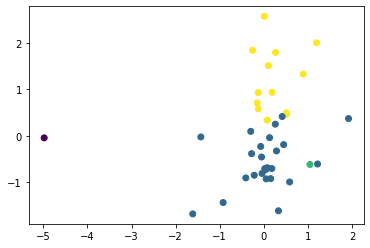

In [37]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model.predict(df_scaled)

# Print the resulting array of cluster values.
plt.scatter(df_scaled['price_change_percentage_24h'], df_scaled['price_change_percentage_7d'], c=clusters)

In [38]:
# Create a copy of the DataFrame
df_scaled_predictions = df_scaled.copy()

In [40]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled_predictions['clusters'] = clusters

# Display sample data
df_scaled_predictions.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [41]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_scaled_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters",
    hover_cols = ["coin_id"],
)


:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [42]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [43]:
# Use the PCA model with `fit_transform` to reduce to three principal components.
pca_data = pca_model.fit_transform(df_scaled)
#df_pca = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])


# View the first five rows of the DataFrame. 
pca_data[:5]


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [44]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.

# Retrieve the explained variance
explained_variance = pca_model.explained_variance_ratio_

# Create a DataFrame to display the explained variance
df_explained_variance = pd.DataFrame({'Principal Component': ['PC1', 'PC2', 'PC3'],
                                      'Explained Variance': explained_variance})
    
# Display the DataFrame
df_explained_variance




,Principal Component,Explained Variance
0,PC1,0.371986
1,PC2,0.347008
2,PC3,0.176038


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The 89% is the total explained variance of the three principal components

In [45]:
# Create a new DataFrame with the PCA data.
df_with_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])


# Copy the crypto names from the original data
df_with_pca['coin_id'] = df_scaled.index

# Set the coin_id column as index
df_with_pca = df_with_pca.set_index('coin_id')

# Display sample data
df_with_pca.head(5)


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [58]:
# Create a list with the number of k-values from 1 to 11
k_PCA = list(range(1,11))

In [59]:
# Create an empy list to store the inertia values
inertia_PCA = []

# Create a for loop to compute the inertia with each possible value of k
for i in k_PCA:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=i, random_state=1)
# 2. Fit the model to the data using `df_market_data_pca`
    model.fit(df_with_pca)
# 3. Append the model.inertia_ to the inertia list
    inertia_PCA.append(model.inertia_)

C:\Users\rober\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


In [61]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_PCA = {'k': k_PCA,'inertia': inertia_PCA}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_PCA = pd.DataFrame(elbow_data_PCA)
df_elbow_PCA

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.352251
5,6,27.618972
6,7,21.134056
7,8,17.437664
8,9,13.742792
9,10,10.484890


In [62]:
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
df_elbow_PCA.hvplot.line(x='k',
                     y='inertia',
                     xlabel='Number of Clusters (k_values)',
                     ylabel='Inertia',
                     title='Elbow Curve with PCA',
                     xticks=k)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [63]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [64]:
# Fit the K-Means model using the PCA data
model.fit(df_with_pca)

KMeans(n_clusters=4, random_state=1)

In [65]:
# Predict the clusters to group the cryptocurrencies using the PCA data
stock_clusters = model.predict(df_with_pca)

# Print the resulting array of cluster values.
print(stock_clusters)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [66]:
# Create a copy of the DataFrame with the PCA data
df_with_pca_predictions = df_with_pca.copy()


# Add a new column to the DataFrame with the predicted clusters
df_with_pca_predictions["Clusters"] = stock_clusters

# Display sample data
df_with_pca_predictions.head(5)


,PC1,PC2,PC3,Clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [67]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_with_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Clusters",
    hover_cols = ["coin_id"],
)

:NdOverlay   [Clusters]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [69]:
# Composite plot to contrast the Elbow curves
elbow_pca_plot = df_elbow_PCA.hvplot.line(
    x='k',
    y='inertia',
    xlabel='Number of Clusters (k_values)',
    ylabel='Inertia',
    title='Elbow Curve',
    xticks=k,
    color='red'
)

elbow_plot = df_elbow.hvplot.line(
    x='k',
    y='inertia',
    xlabel='Number of Clusters (k_values)',
    ylabel='Inertia',
    title='Elbow Curve',
    xticks=k,
    color='blue'
)

# Composite the plots
composite_plot = elbow_pca_plot * elbow_plot

# Display the composite plot
composite_plot


:Overlay
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [71]:
# Composite plot to contrast the clusters
# Composite plot to contrast the Elbow curves
clusters_pca_plot = df_with_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Clusters",
    hover_cols = ["coin_id"],
)

clusters_plot = df_scaled_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="clusters",
    hover_cols = ["coin_id"],
)

# Composite the plots
composite_plot_clusters = clusters_pca_plot + clusters_plot

# Display the composite plot
composite_plot_clusters

:Layout
   .NdOverlay.I  :NdOverlay   [Clusters]
      :Scatter   [PC1]   (PC2,coin_id)
   .NdOverlay.II :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** A higher concentration of the datapoint of the cluster